In [94]:
import tensorflow as tf
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

## **Data Preparation**

In [95]:
data = pd.read_csv(r"d:\AWS machine learning\deep learning for computer vision\archive (8)\train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [96]:
data.shape

(1000, 12)

In [97]:
# data = pd.read_csv("train_semi.csv", ",")
# data.head()
# data.shape

In [98]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [99]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[8.20000e+02 5.41461e+05 8.43856e+05 6.00000e+00 6.75450e+04 5.00000e+00
  6.00000e+00 1.10000e+01 1.54000e+02 1.10000e+02 1.13000e+02 4.24290e+05]
 [1.34000e+02 6.60260e+05 7.91726e+05 2.00000e+00 7.53110e+04 4.00000e+00
  4.00000e+00 1.00000e+01 1.43000e+02 7.40000e+01 8.90000e+01 4.25960e+05]
 [2.90000e+01 6.67905e+05 8.42018e+05 7.00000e+00 1.43488e+05 4.00000e+00
  4.00000e+00 1.20000e+01 1.42000e+02 7.40000e+01 7.40000e+01 1.73847e+05]
 [4.01000e+02 5.84015e+05 7.24269e+05 7.00000e+00 1.05792e+05 4.00000e+00
  8.00000e+00 1.50000e+01 1.53000e+02 8.60000e+01 9.50000e+01 2.39746e+05]
 [6.93000e+02 5.11914e+05 7.36702e+05 4.00000e+00 5.23810e+04 3.00000e+00
  6.00000e+00 1.00000e+01 1.55000e+02 7.00000e+01 1.20000e+02 4.18504e+05]], shape=(5, 12), dtype=float32)


In [100]:
X = tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[6.00000e+00 6.75450e+04 5.00000e+00 6.00000e+00 1.10000e+01 1.54000e+02
  1.10000e+02 1.13000e+02]
 [2.00000e+00 7.53110e+04 4.00000e+00 4.00000e+00 1.00000e+01 1.43000e+02
  7.40000e+01 8.90000e+01]
 [7.00000e+00 1.43488e+05 4.00000e+00 4.00000e+00 1.20000e+01 1.42000e+02
  7.40000e+01 7.40000e+01]
 [7.00000e+00 1.05792e+05 4.00000e+00 8.00000e+00 1.50000e+01 1.53000e+02
  8.60000e+01 9.50000e+01]
 [4.00000e+00 5.23810e+04 3.00000e+00 6.00000e+00 1.00000e+01 1.55000e+02
  7.00000e+01 1.20000e+02]], shape=(5, 8), dtype=float32)


In [101]:
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1)
print(y[:5])

(5,)
tf.Tensor(
[[424290.]
 [425960.]
 [173847.]
 [239746.]
 [418504.]], shape=(5, 1), dtype=float32)


In [102]:
print(X.shape)

(1000, 8)


In [103]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [104]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [105]:
# Create a TensorFlow dataset from the features and labels
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Prepare the dataset with shuffling, batching, and prefetching
train_dataset = (train_dataset
                 .shuffle(buffer_size=min(len(X_train), 10000), reshuffle_each_iteration=True)  # Use a reasonable buffer size for shuffling
                 .batch(32)  # Batch size; adjust based on memory and model requirements
                 .prefetch(tf.data.AUTOTUNE))  # Optimize data loading



In [106]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [107]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [108]:
# Create a TensorFlow dataset from the validation features and labels
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

# Prepare the validation dataset with batching and prefetching
val_dataset = (val_dataset
               .batch(32)  # Batch size; adjust based on your requirements
               .prefetch(tf.data.AUTOTUNE))  # Optimize data loading


In [109]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [110]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [111]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.8453252 , -1.1231872 ,  1.429383  ,  0.1360987 , -0.31040144,
        -0.67390615,  1.2900339 ,  0.4323479 ],
       [-1.4926529 , -0.8566946 ,  0.7182472 , -0.5755282 , -0.7602589 ,
        -1.242113  , -0.47890252, -0.7108943 ],
       [ 1.4298197 ,  1.4828188 ,  0.7182472 , -0.5755282 ,  0.139456  ,
        -1.2937682 , -0.47890252, -1.4254206 ],
       [ 1.4298197 ,  0.18926974,  0.7182472 ,  0.8477256 ,  1.4890283 ,
        -0.7255613 ,  0.11074297, -0.42508373],
       [-0.32366386, -1.6435442 ,  0.00711135,  0.1360987 , -0.7602589 ,
        -0.62225103, -0.675451  ,  0.76579356]], dtype=float32)>

In [112]:
print(X[:5])

tf.Tensor(
[[6.00000e+00 6.75450e+04 5.00000e+00 6.00000e+00 1.10000e+01 1.54000e+02
  1.10000e+02 1.13000e+02]
 [2.00000e+00 7.53110e+04 4.00000e+00 4.00000e+00 1.00000e+01 1.43000e+02
  7.40000e+01 8.90000e+01]
 [7.00000e+00 1.43488e+05 4.00000e+00 4.00000e+00 1.20000e+01 1.42000e+02
  7.40000e+01 7.40000e+01]
 [7.00000e+00 1.05792e+05 4.00000e+00 8.00000e+00 1.50000e+01 1.53000e+02
  8.60000e+01 9.50000e+01]
 [4.00000e+00 5.23810e+04 3.00000e+00 6.00000e+00 1.00000e+01 1.55000e+02
  7.00000e+01 1.20000e+02]], shape=(5, 8), dtype=float32)


## **Model Creation and Training**

In [113]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

c:\Users\RTX\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [120]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = [RootMeanSquaredError()])

In [121]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=100,
                    verbose=1)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 214836.9062 - root_mean_squared_error: 253906.0938 - val_loss: 66699.4688 - val_root_mean_squared_error: 79210.1328
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54025.7734 - root_mean_squared_error: 65968.1094 - val_loss: 51073.2305 - val_root_mean_squared_error: 61596.4688
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42910.0312 - root_mean_squared_error: 53131.1992 - val_loss: 51996.8633 - val_root_mean_squared_error: 60749.2500
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46984.3320 - root_mean_squared_error: 58172.3672 - val_loss: 59452.3203 - val_root_mean_squared_error: 75664.6172
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49507.8047 - root_mean_squared_error: 63353.1914 - val_loss: 52298.9883 - val_root_mean_squared_error: 62601.6523
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53871.2852 - root_mean_squared_error: 67571.9922 - val_loss: 48369.2148 - 

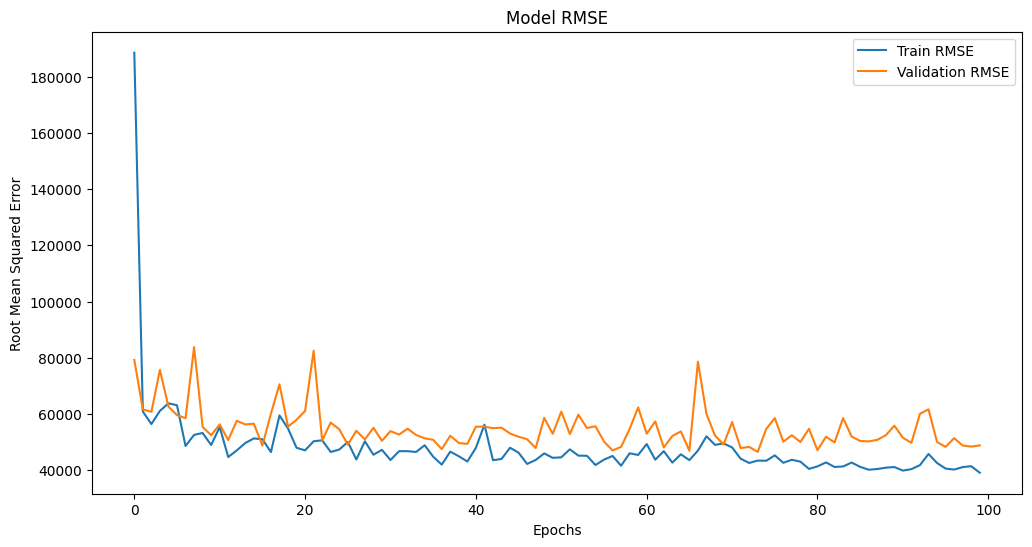

Final training RMSE: 39073.6719
Final validation RMSE: 48790.7070


In [123]:
import matplotlib.pyplot as plt

# Training RMSE
train_rmse = history.history['root_mean_squared_error']
# Validation RMSE
val_rmse = history.history['val_root_mean_squared_error']

# Plot RMSE
plt.figure(figsize=(12, 6))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.title('Model RMSE')
plt.show()

# Print final training and validation RMSE
print(f"Final training RMSE: {train_rmse[-1]:.4f}")
print(f"Final validation RMSE: {val_rmse[-1]:.4f}")


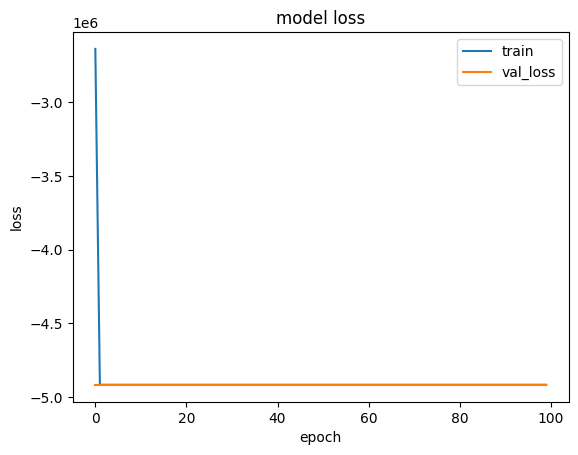

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

In [118]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

KeyError: 'root_mean_squared_error'

## **Model Evaluation and Testing**

In [ ]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 38487.5430 - root_mean_squared_error: 46779.8086  


[37940.55078125, 45897.578125]

In [ ]:
X_test.shape

TensorShape([100, 8])

In [ ]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[171451.28]], dtype=float32)

In [ ]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([116254.5], dtype=float32)>

In [ ]:
y_true = list(y_test[:,0].numpy())

In [ ]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[171451.25, 299830.7, 428565.97, 384304.6, 314262.84, 183784.2, 354494.34, 132076.19, 200817.42, 315800.8, 221600.39, 208351.02, 244739.39, 209433.31, 223059.05, 495474.66, 436952.6, 296807.56, 394664.2, 308077.47, 513346.78, 282067.1, 443424.28, 333977.2, 309530.47, 321061.16, 369524.28, 312857.3, 258972.23, 374297.1, 206396.58, 192200.47, 103213.516, 262915.66, 312152.78, 413484.34, 309356.22, 486674.34, 255864.23, 311482.9, 503448.88, 220792.14, 444628.28, 470387.78, 262851.44, 243457.61, 447200.7, 168031.89, 479405.22, 314229.56, 153845.83, 264998.47, 401372.84, 438018.03, 187139.33, 318057.53, 350624.2, 209438.2, 146086.7, 363416.72, 179069.36, 321589.0, 129101.516, 462569.03, 419578.28, 248542.36, 163866.42, 275499.84, 457087.28, 289519.06, 321082.72, 417990.97, 298859.88, 141502.64, 221724.9, 428348.84, 425889.75, 347161.5, 505175.22, 124100.766, 253265.92, 495971.1, 441466.6, 192833.88, 124580.94, 430711.72, 216222.64, 284564.84, 205617.78,

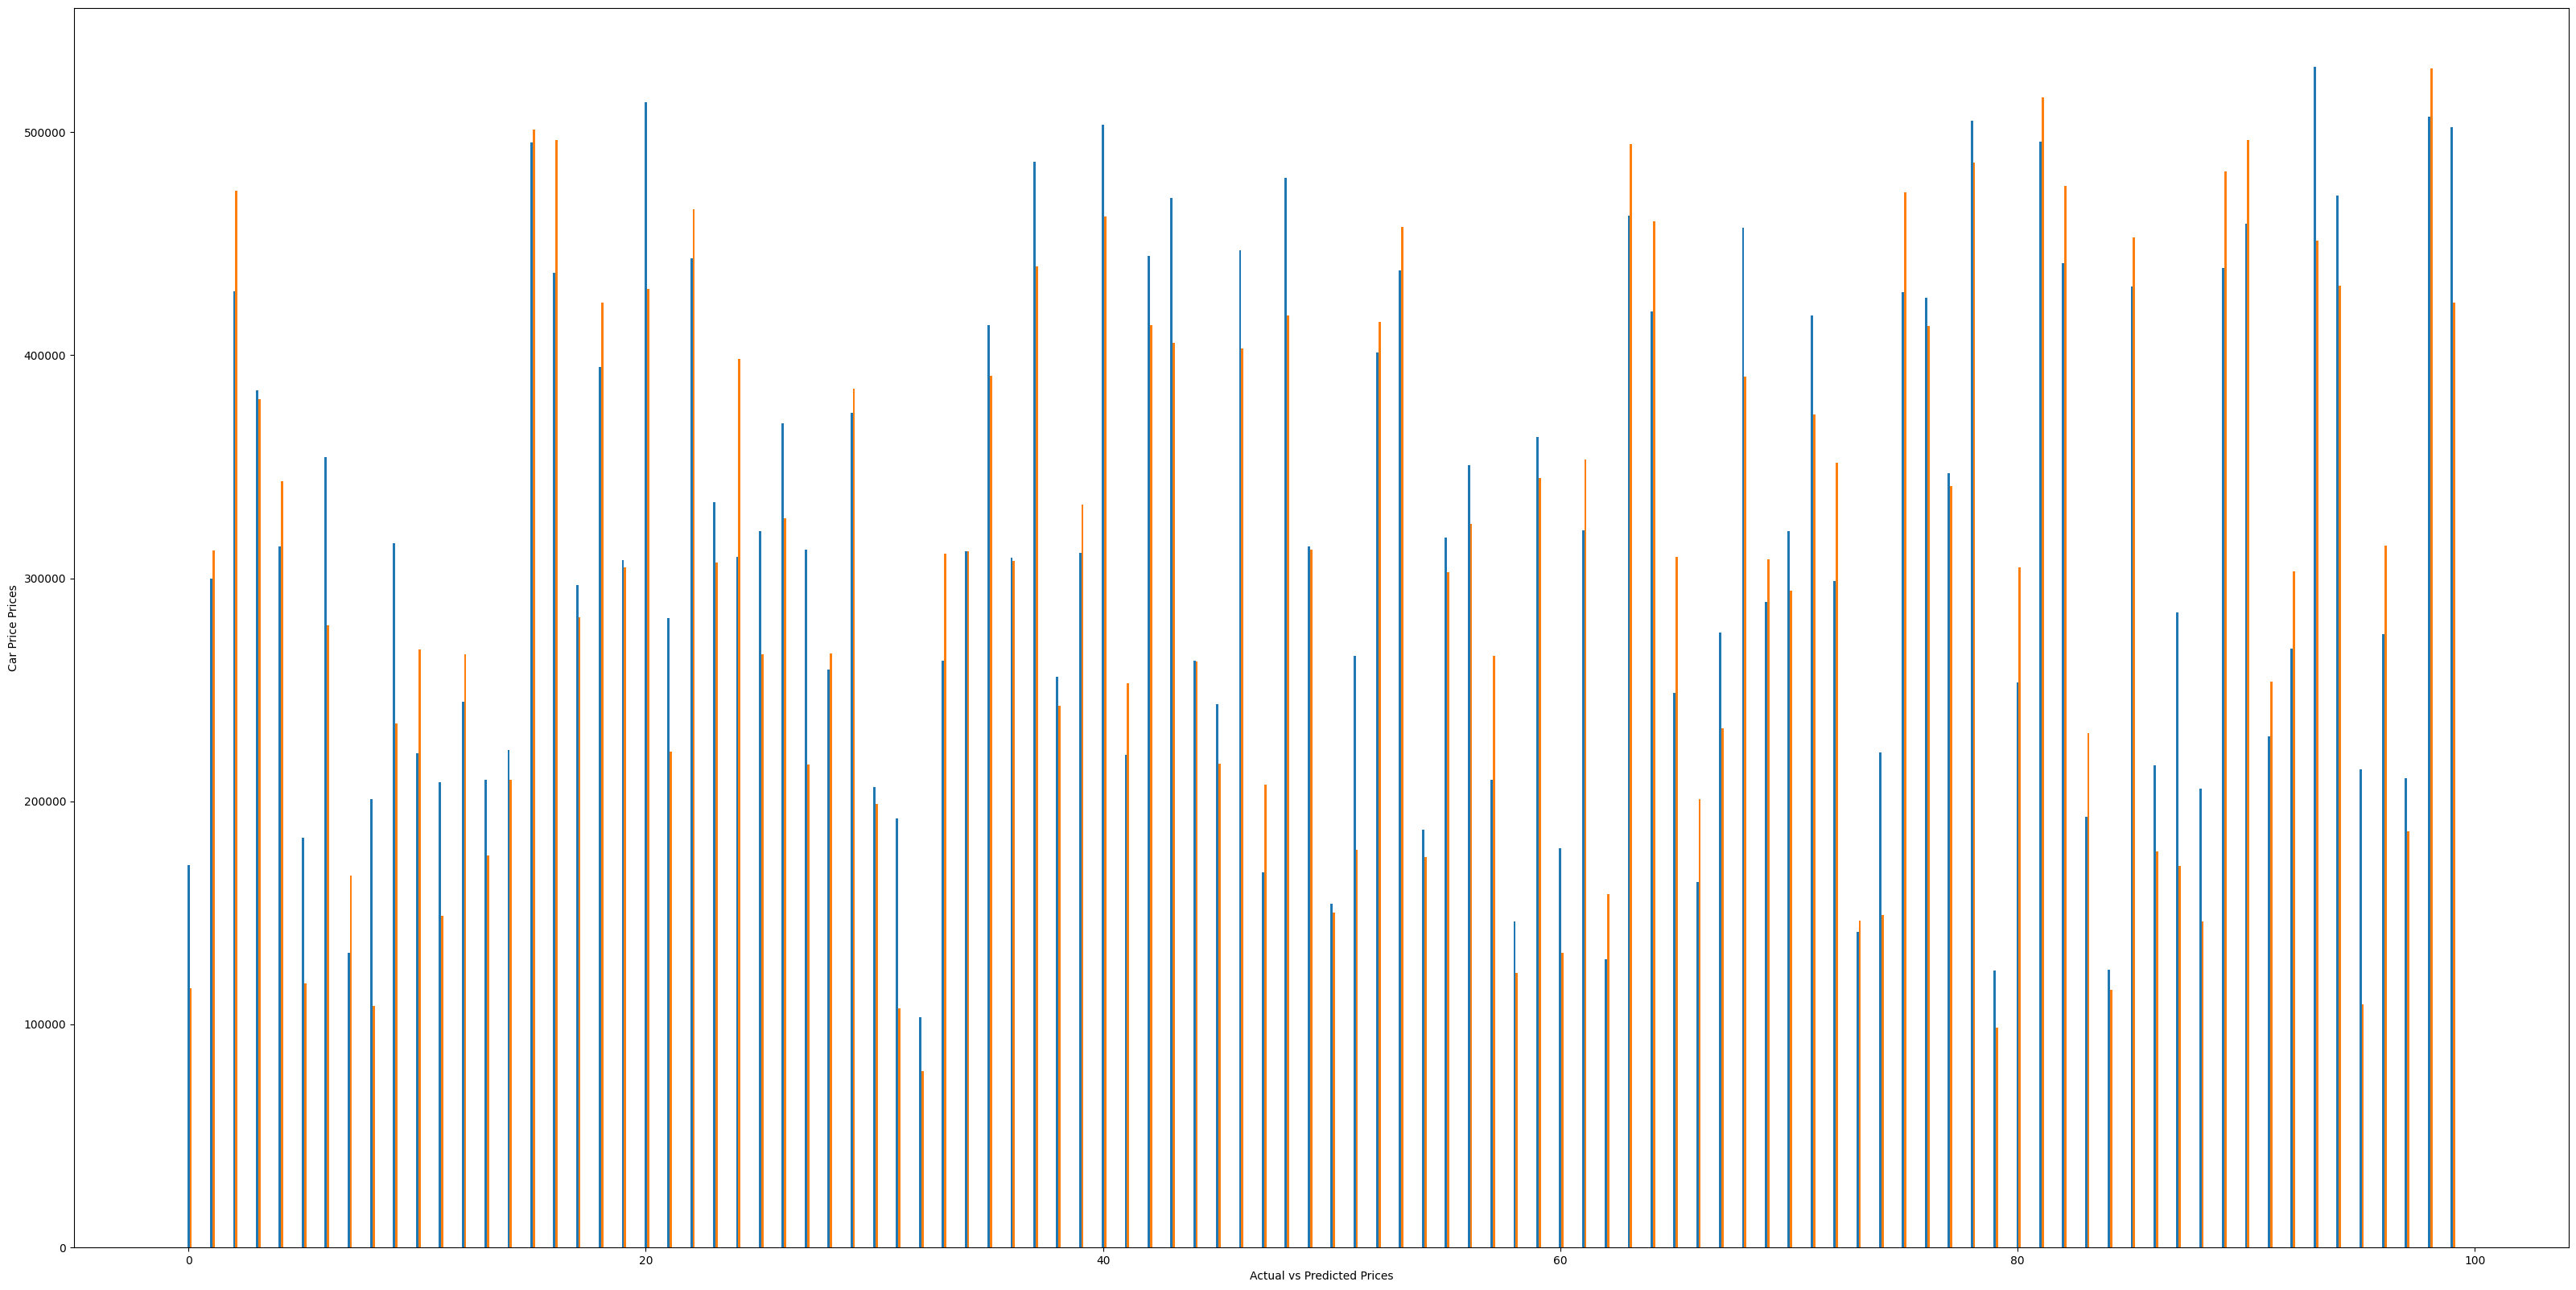

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()